TEST: [0]
12327.709115199874
0.7677253149700922


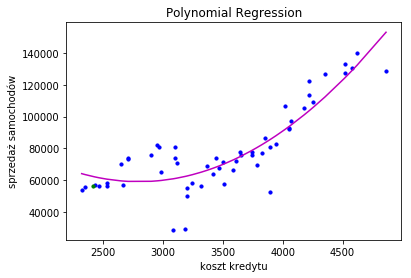

TEST: [1]
12268.34292689687
0.7691089460011603


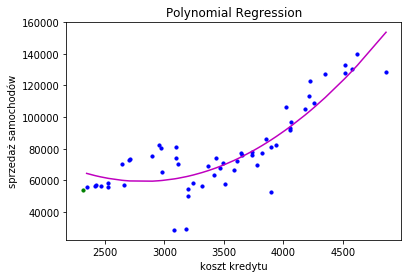

TEST: [2]
12310.034531110483
0.7682548861034614


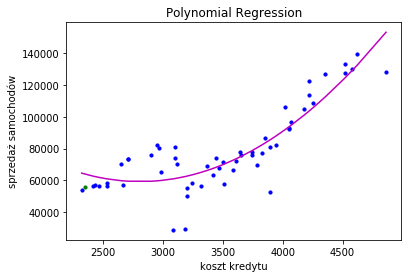

TEST: [3]
12337.358268157768
0.7672677693416785


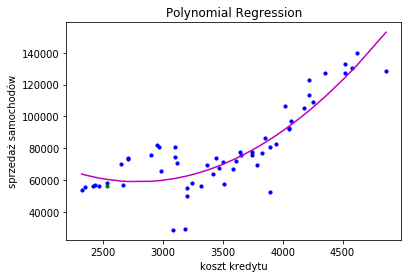

TEST: [4]
12348.189476833197
0.7675153699919729


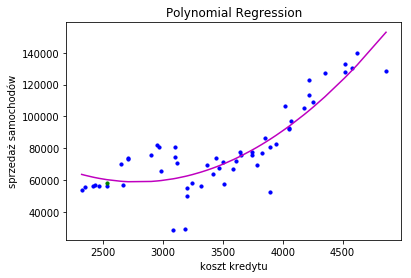

TEST: [5]
12335.696880825646
0.7676604412849182


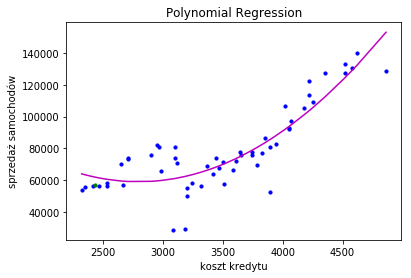

TEST: [6]
12333.838952611775
0.7674933897808855


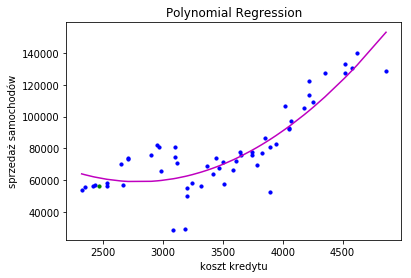

TEST: [7]
12347.10366426077
0.7671607762952901


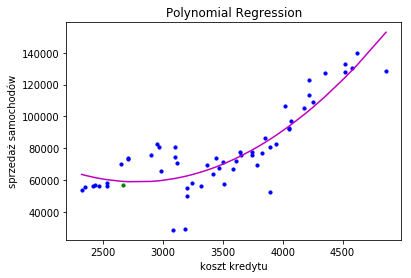

TEST: [8]
12180.581442125305
0.7761969715873789


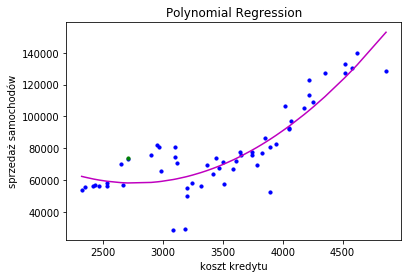

TEST: [9]
12256.636033608482
0.7730952780094564


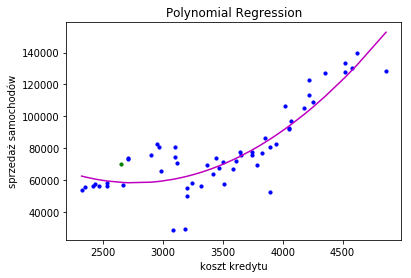

TEST: [10]
12193.048236350895
0.775704073764256


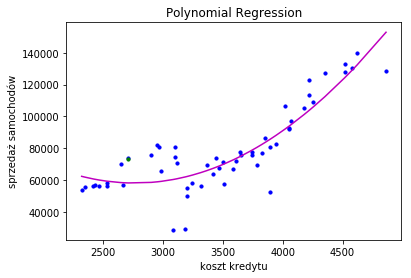

TEST: [11]
12140.401666113472
0.7777653888746865


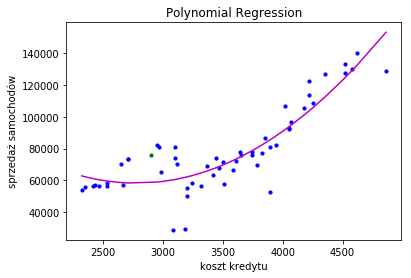

TEST: [12]
12325.008216224714
0.7699087958637849


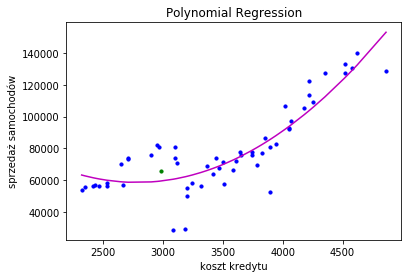

TEST: [13]
11944.251321974483
0.784854228630919


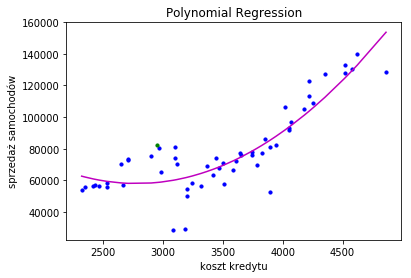

TEST: [14]
12007.498914661053
0.7826300985069776


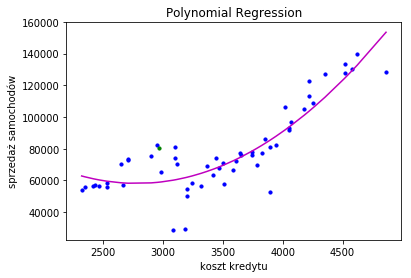

TEST: [15]
12041.235695703112
0.7813972717688065


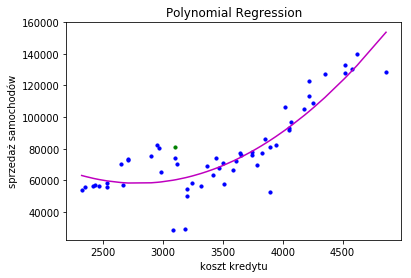

TEST: [16]
11491.737212539043
0.7864688534350306


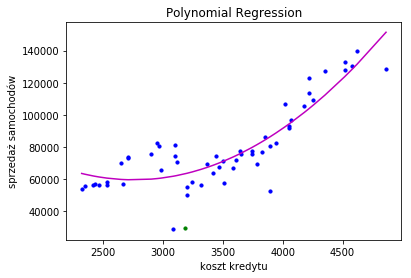

TEST: [17]
11545.568936676293
0.7840838061545422


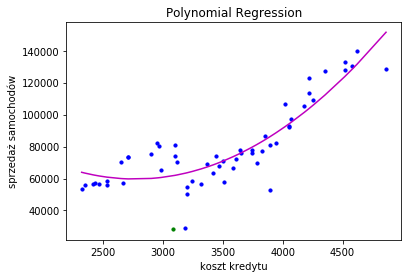

TEST: [18]
12284.173501396113
0.7721135586438937


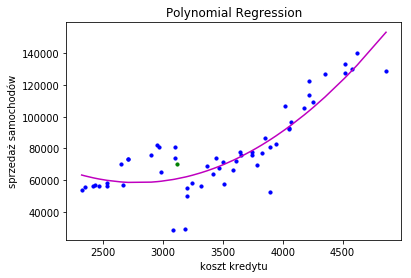

TEST: [19]
12215.307779265566
0.7749515047133577


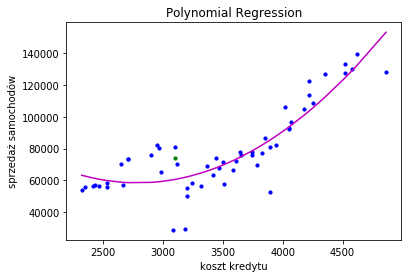

TEST: [20]
12295.15689733731
0.7689743782343766


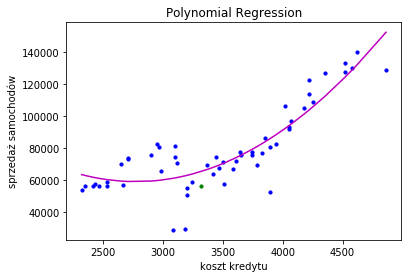

TEST: [21]
12305.469778261435
0.768099730919058


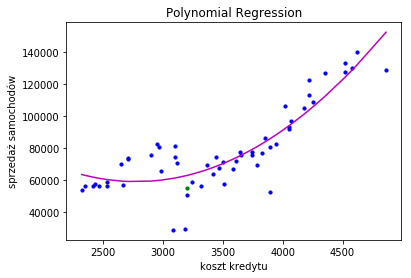

TEST: [22]
12233.473836985962
0.7692428780006442


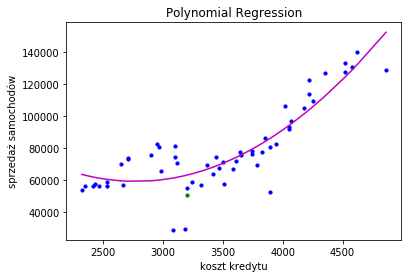

TEST: [23]
12331.727901517763
0.7681445615114358


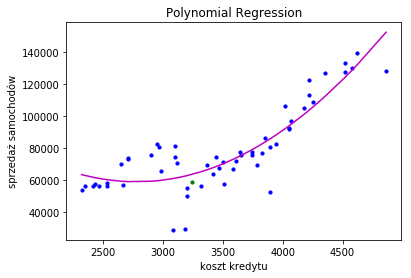

TEST: [24]
12349.091139715967
0.7693412388083445


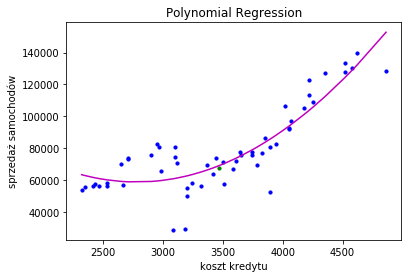

TEST: [25]
12343.667205895254
0.7697537807746506


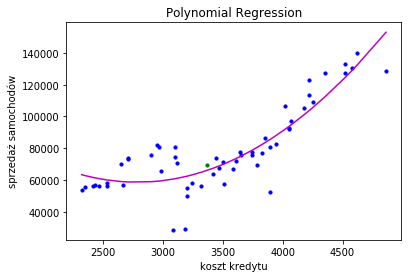

TEST: [26]
12338.843396499058
0.7690557665688601


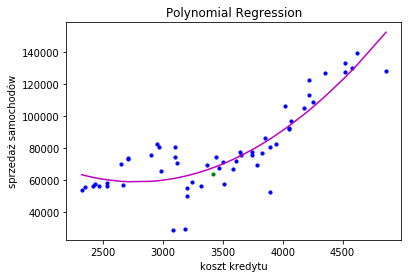

TEST: [27]
12323.142774630565
0.770954540480468


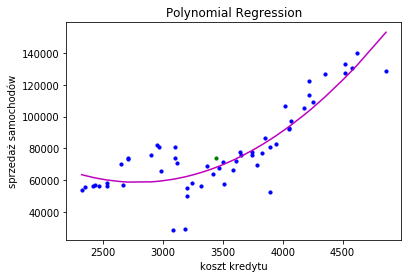

TEST: [28]
12345.52557114328
0.7702408676525573


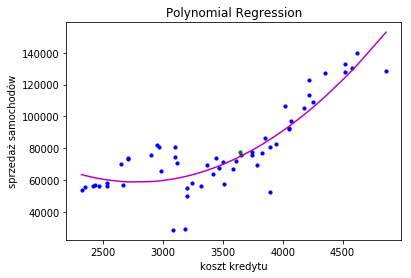

TEST: [29]
12349.157165903218
0.7697664069285356


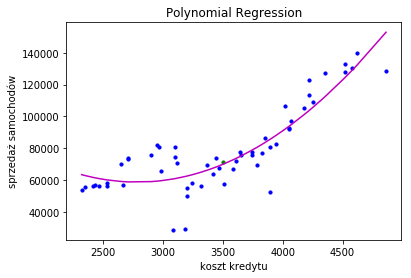

TEST: [30]
12228.4694742964
0.7718089616559713


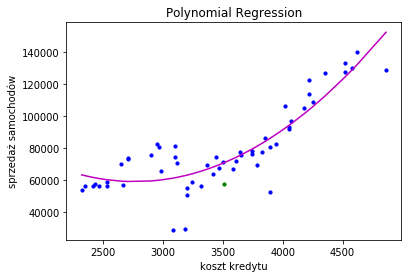

TEST: [31]
12321.50292035339
0.7702371791257047


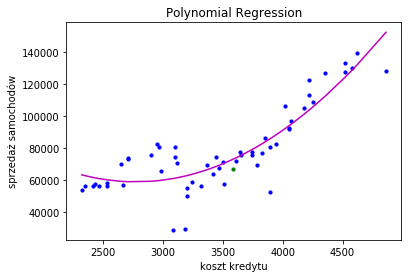

TEST: [32]
12344.431417109097
0.7702424074575811


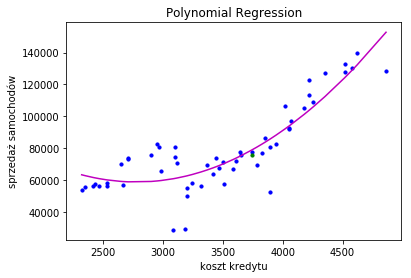

TEST: [33]
12348.31682350295
0.769873199670151


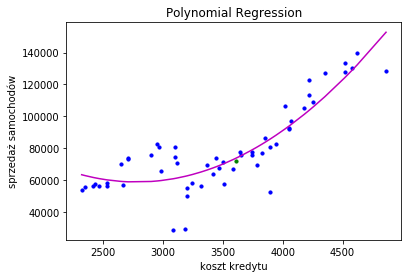

TEST: [34]
12350.251089012954
0.7700225918485955


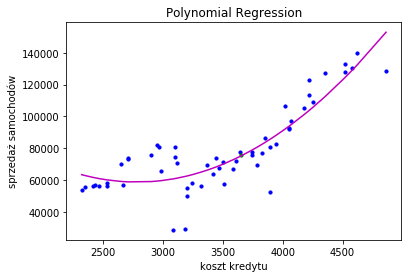

TEST: [35]
12330.186323871287
0.7708053389645058


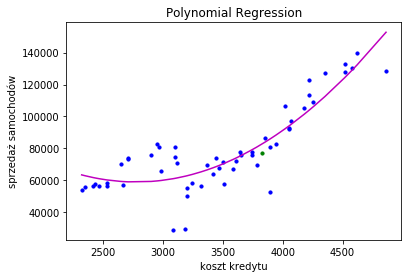

TEST: [36]
11483.222603548069
0.797385146178049


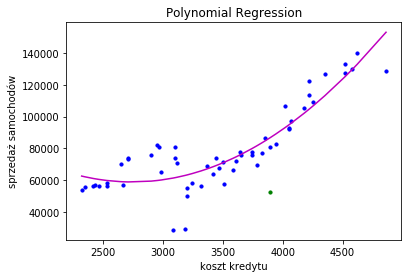

TEST: [37]
12349.848011309183
0.7700824253484873


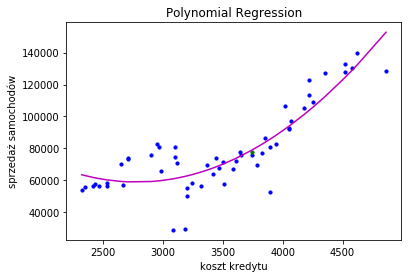

TEST: [38]
12258.953891804525
0.7729397181403528


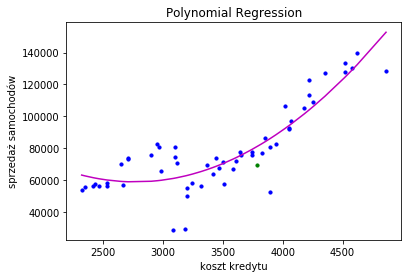

TEST: [39]
12327.26317646153
0.7708267951187883


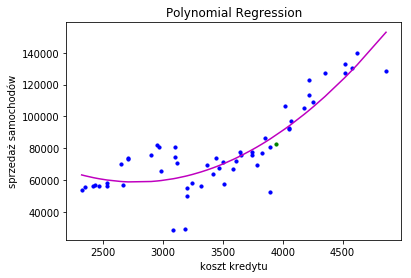

TEST: [40]
12347.875779853046
0.7689781370255304


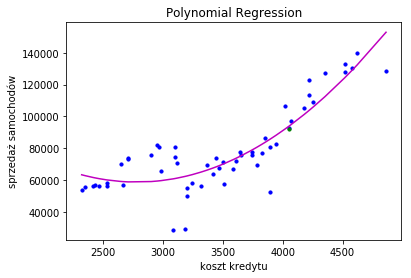

TEST: [41]
12345.298247729266
0.769860707069838


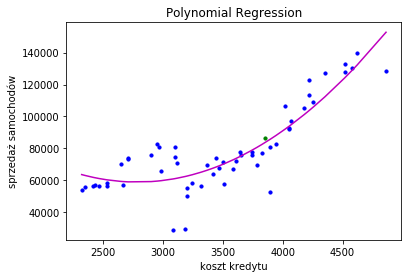

TEST: [42]
12332.36866667039
0.7707040718695379


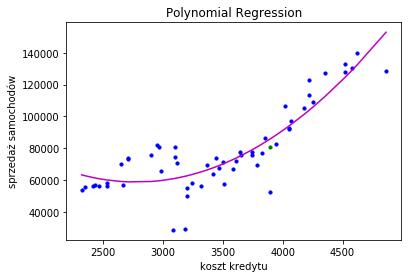

TEST: [43]
12346.298239232165
0.7680217200777125


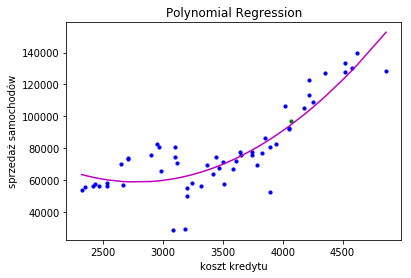

TEST: [44]
12338.682271546997
0.7658556051434415


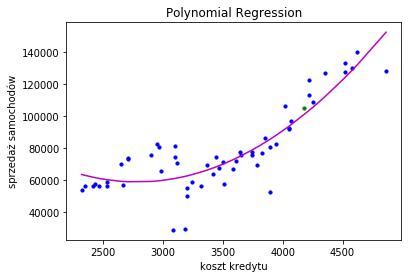

TEST: [45]
12190.347295180212
0.771006682387888


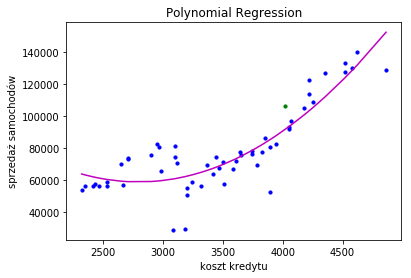

TEST: [46]
12349.545006330478
0.7687818033114069


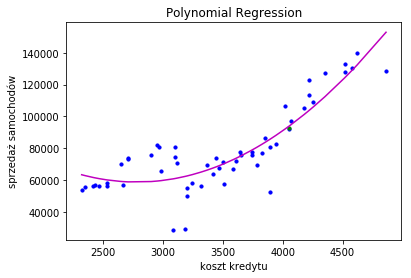

TEST: [47]
12275.343430358149
0.7648519374979276


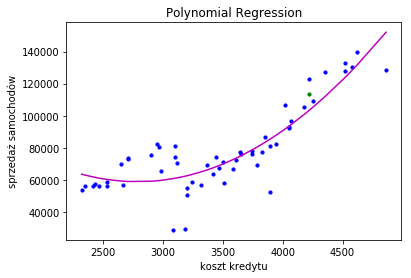

TEST: [48]
12180.217350678471
0.7606276646126789


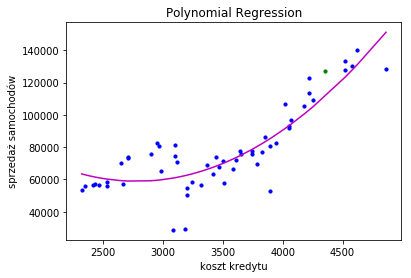

TEST: [49]
12072.700449231623
0.7677065190455131


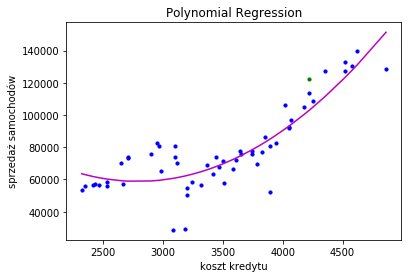

TEST: [50]
12343.196061354944
0.7642404838709869


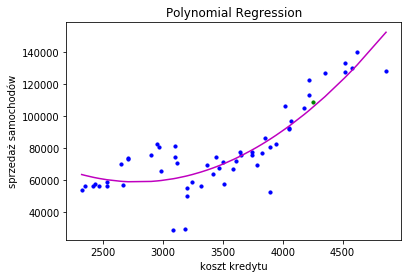

TEST: [51]
12340.407206046715
0.7539256947601148


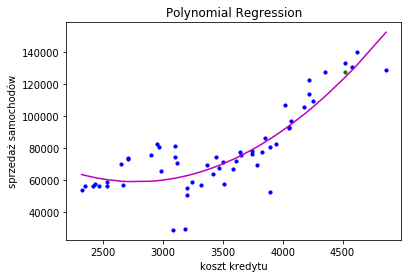

TEST: [52]
12301.595483288404
0.7451409196808821


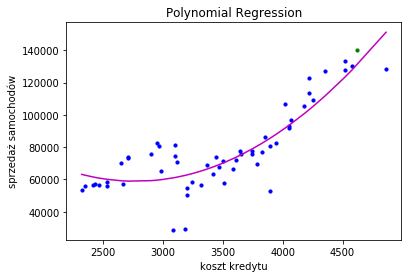

TEST: [53]
12287.952971162264
0.7517390062588986


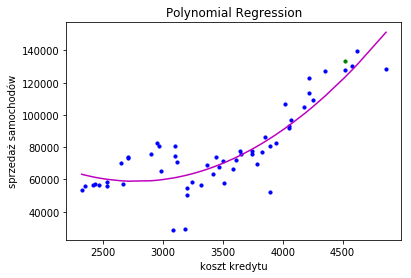

TEST: [54]
12348.994304412565
0.7515672626021479


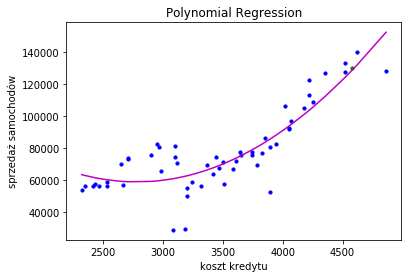

TEST: [55]
11731.322635073135
0.7769963100376676


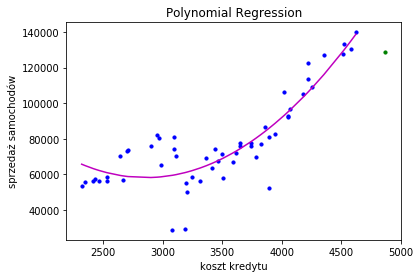

In [2]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
X = np.array([[2415.45],[2318.53],[2347.24],[2528.62],[2530.18],[2427.27],[2464.66],[2662.51], [2709.14],[2644.34],[2703.41],[2899.83],
     [2983.98],[2951.36],[2968.55],[3096.55],[3185.61],[3081.48],[3113.86],[3096.55],[3316.38],[3197.85],[3203.08],[3243.6],
     [3466.33],[3366.11],[3416.00],[3438.21],[3646.09],[3496.82],[3510.22],[3586.75],[3740.05],[3612.51],[3651.72],[3823.32],
     [3895.31],[3739.97],[3781.14],[3942.67],[4054.89],[3854.88],[3895.33],[4066.95],[4181.49],[4019.08],[4055.04],[4218.92],
     [4353.55],[4220.69],[4255.59],[4516.69],[4622.84],[4521.08],[4580.2],[4864.00]])
y = np.array([56405,53648,55942,56086,58426,57231,56402,56984,73694,70154,73158,75642,65473,82351,80654,
   81004,29313,28720,70526,74256,56488,54867,50274,58463,67610,69213,63622,74148,77577,71236,
   57697,66701,75906,72085,75816,77176,52522,77795,69525,82517,92108,86412,80826,96991,105236,
   106486,92850,113486,127098,122628,109003,127606,139885,133160,130298,128546])
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    polynomial_features= PolynomialFeatures(degree=2)
    X_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly, y_train)
    y_poly_pred = model.predict(X_poly)

    rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
    r2 = r2_score(y_train,y_poly_pred)
    print(rmse)
    print(r2)
    plt.scatter(X_train, y_train, s=10,color='b')
    plt.scatter(X_test, y_test, s=10,color='g')
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
    X_train, y_poly_pred = zip(*sorted_zip)
    plt.plot(X_train, y_poly_pred, color='m')
    plt.title('Polynomial Regression') 
    plt.xlabel('koszt kredytu')
    plt.ylabel('sprzedaż samochodów')
    plt.show()